<a href="https://colab.research.google.com/github/ynebin/class2024Spring/blob/main/W10_0510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Week 10.
<br>
Pandas</h1>

## DataFrame

In [ ]:
import pandas as pd

weather_df = pd.read_csv("weather.csv")
product_df = pd.read_csv("product.csv")

In [ ]:
weather_df

,Temperature,Humidity,City
0,22.2,30,New York
1,20.0,50,Los Angeles
2,18.3,45,Chicago
3,23.9,35,Houston
4,21.1,40,Phoenix


In [ ]:
product_df

,Category,Item,Price,Quantity
0,Fruit,Apple,0.85,50
1,Fruit,Banana,0.65,60
2,Vegetable,Carrot,0.50,70
3,Vegetable,Bean,1.50,40
4,Fruit,Apple,0.90,55
5,Vegetable,Carrot,0.55,75


## indexing

In [ ]:
# Column

weather_df["Temperature"]

0    22.2
1    20.0
2    18.3
3    23.9
4    21.1
Name: Temperature, dtype: float64

In [ ]:
# Column (simpler version)

weather_df.Temperature

0    22.2
1    20.0
2    18.3
3    23.9
4    21.1
Name: Temperature, dtype: float64

In [ ]:
# Row

weather_df.loc[0]  # 0th row

Temperature        22.2
Humidity             30
City           New York
Name: 0, dtype: object

In [ ]:
# Specific element (row & column)

weather_df.loc[0, "Temperature"]  # 0th row and Temperature column

22.2

## slicing

In [ ]:
# Column

weather_df[["Humidity", "City"]]  # pick the columns that you want to see

,Humidity,City
0,30,New York
1,50,Los Angeles
2,45,Chicago
3,35,Houston
4,40,Phoenix


In [ ]:
# Row

weather_df.loc[1:2]  # get the 1st and 2nd rows

,Temperature,Humidity,City
1,20.0,50,Los Angeles
2,18.3,45,Chicago


In [ ]:
# Row & column

weather_df.loc[1:2, ["Humidity", "City"]]

,Humidity,City
1,50,Los Angeles
2,45,Chicago


## adding

In [ ]:
# Adding a sample (row)

weather_df.loc[5] = {"Temperature": 19, "Humidity": 28, "City": "Seoul"}

weather_df

,Temperature,Humidity,City
0,22.2,30,New York
1,20.0,50,Los Angeles
2,18.3,45,Chicago
3,23.9,35,Houston
4,21.1,40,Phoenix
5,19.0,28,Seoul


## deleting

In [ ]:
# Deleting a row

weather_df = weather_df.drop(5, axis=0)  # assignment is needed to change weather_df

weather_df

,Temperature,Humidity,City
0,22.2,30,New York
1,20.0,50,Los Angeles
2,18.3,45,Chicago
3,23.9,35,Houston
4,21.1,40,Phoenix


In [ ]:
# Deleting a column

weather_df.drop("Temperature", axis=1)  # weather_df actually does not change (no assignment)

,Humidity,City
0,30,New York
1,50,Los Angeles
2,45,Chicago
3,35,Houston
4,40,Phoenix


## summary

In [ ]:
weather_df.describe()

,Temperature,Humidity
count,5.000000,5.000000
mean,21.100000,40.000000
std,2.127205,7.905694
min,18.300000,30.000000
25%,20.000000,35.000000
50%,21.100000,40.000000
75%,22.200000,45.000000
max,23.900000,50.000000


## grouping

<h3>value_counts</h3>

returns the frequency of each distinct row in the DataFrame

In [ ]:
product_df.Category.value_counts()  # there are 3 types of fruits and 3 types of vegetables

Fruit        3
Vegetable    3
Name: Category, dtype: int64

In [ ]:
product_df.Item.value_counts()

Apple     2
Carrot    2
Banana    1
Bean      1
Name: Item, dtype: int64

<h3>groupby</h3>

used to group rows of a DataFrame

In [ ]:
product_df.groupby("Category").mean(numeric_only=True)  # returns a new DataFrame with the mean values of "Price" and "Quantity" for each unique category in the "Category" column

,Price,Quantity
Category,,
Fruit,0.80,55.000000
Vegetable,0.85,61.666667


## basic operators

In [ ]:
product_df.Quantity + 2  # adds 2 to each value in the Quantity column (you can try other arithmetic operators)

0    52
1    62
2    72
3    42
4    57
5    77
Name: Quantity, dtype: int64

In [ ]:
product_df.Quantity > 60  # checks whether each value in the Quantity column is greater than 60 (you can try other comparison operators)

0    False
1    False
2     True
3    False
4    False
5     True
Name: Quantity, dtype: bool

## filtering

In [ ]:
product_df[product_df.Quantity > 60]  # filters a DataFrame to include only rows where the Quantity column has a value greater than 60

,Category,Item,Price,Quantity
2,Vegetable,Carrot,0.50,70
5,Vegetable,Carrot,0.55,75


## sorting

In [ ]:
product_df.sort_values(by="Category")  # sorts a DataFrame based on the values in the Category column (in alphabetical order)

,Category,Item,Price,Quantity
0,Fruit,Apple,0.85,50
1,Fruit,Banana,0.65,60
4,Fruit,Apple,0.90,55
2,Vegetable,Carrot,0.50,70
3,Vegetable,Bean,1.50,40
5,Vegetable,Carrot,0.55,75


In [ ]:
product_df.sort_values(by="Quantity")  # sorts a DataFrame based on the values in the Quantity column (in ascending order)

,Category,Item,Price,Quantity
3,Vegetable,Bean,1.50,40
0,Fruit,Apple,0.85,50
4,Fruit,Apple,0.90,55
1,Fruit,Banana,0.65,60
2,Vegetable,Carrot,0.50,70
5,Vegetable,Carrot,0.55,75


## plotting

<h3>line plot</h3>

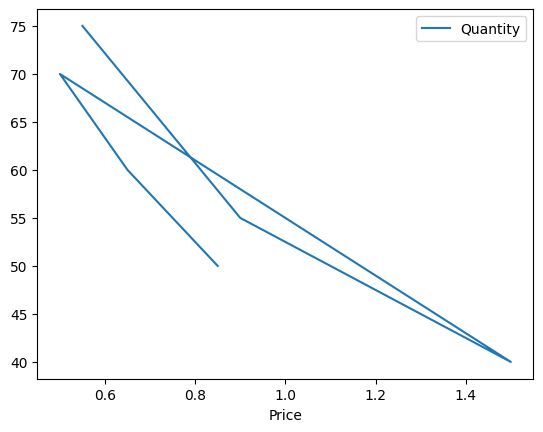

In [ ]:
import matplotlib.pyplot as plt

product_df.plot(x="Price", y="Quantity", kind="line")
plt.show()

<h3>scatter plot</h3>

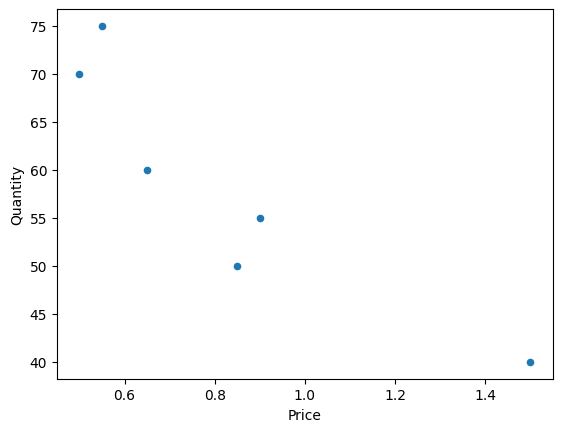

In [ ]:
product_df.plot(x="Price", y="Quantity", kind="scatter")
plt.show()

<h3>bar plot</h3>

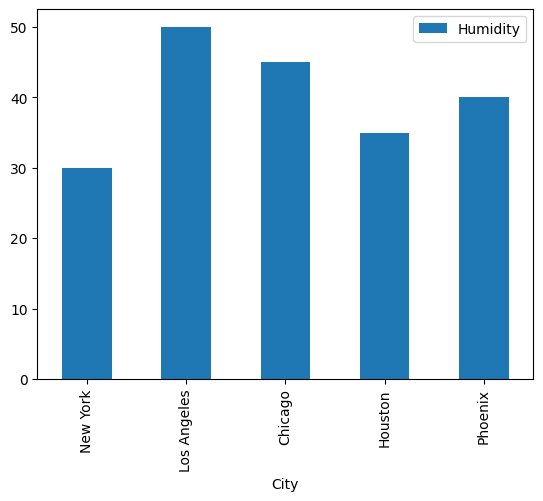

In [ ]:
weather_df.plot(x="City", y="Humidity", kind="bar")
plt.show()

<h3>histogram</h3>

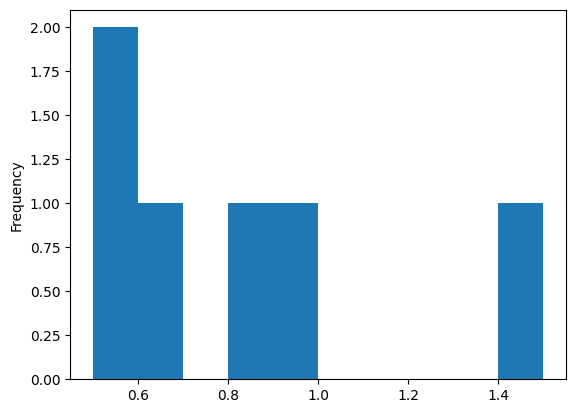

In [ ]:
product_df.Price.plot(kind="hist")
plt.show()

<h3>pie chart</h3>

In [ ]:
sales_df = pd.DataFrame([{"Category": "A", "Sales": 1000}, {"Category": "B", "Sales": 300}, {"Category": "C", "Sales": 450}, {"Category": "D", "Sales": 100}])  # creates a new DataFrame

sales_df

,Category,Sales
0,A,1000
1,B,300
2,C,450
3,D,100


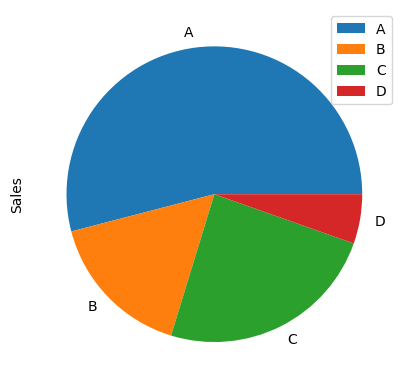

In [ ]:
sales_df.plot(y="Sales", kind="pie", labels=sales_df.Category)
plt.show()